Python group project - ipynb n°3 - Simple and Multiple Regression & Clustering

Note: For the regression part, we are going to use another dataset: crime_rate.xlsx
However interesting Overwatch Analysis was, analysing the features and target of the crime rate in the US provides more relevant information, hilighted by simple and multiple regression analysis.

## 1. Simple Regression: Is there a correlation between the Crime Rate and the number of School Droppers? 

In this section, the objective is to analyse the correlation between 2 variables: Crime Rate in the US and the number of School Droppers. The purpose of this analysis is to determine the linear relationship between those 2 variables. 
We assume that:
- Crime_Rate : Independant Variable (Feature)
- Droppers_Rate : Dependant Variable (Target)

In [11]:
# 0. Import necessary modules #

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# 1. Import the dataset from Excel #

df= pd.read_excel('crime_rate.xlsx')

# 2. Print the first 5 rows of the dataset #

df.head()

,City,Reported_Crime_Rate,Reported_Violent_Crime,Annual_Police_Funds,Droppers_rate
0,City_1,478,184,40,11
1,City_2,494,213,32,11
2,City_3,643,347,57,18
3,City_4,341,565,31,11
4,City_5,773,327,67,9


In [12]:
# 3. Set Indexes #

df=df.set_index('City')
df.head()

,Reported_Crime_Rate,Reported_Violent_Crime,Annual_Police_Funds,Droppers_rate
City,,,,
City_1,478,184,40,11
City_2,494,213,32,11
City_3,643,347,57,18
City_4,341,565,31,11
City_5,773,327,67,9


We can see that the Crime Rate and the Droppers Rate have a significantly different scale. In order to obtain relevant results, we are going to multiply Droppers'value by 100.

In [21]:
# 4. Scale the dataset #

df['Droppers_rate'] = df['Droppers_rate']*100
df.head()

,Reported_Crime_Rate,Reported_Violent_Crime,Annual_Police_Funds,Droppers_rate
City,,,,
City_1,478,184,40,1100
City_2,494,213,32,1100
City_3,643,347,57,1800
City_4,341,565,31,1100
City_5,773,327,67,900


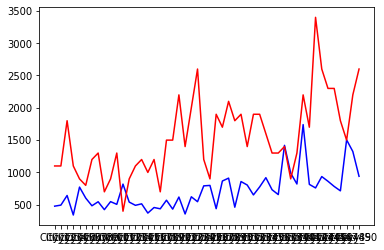

In [22]:
# 5. Define the variables: Reported Crime Rate (independant) and School Droppers (dependant)  #

x= df['Reported_Crime_Rate']
y= df['Droppers_rate']

# 6. Plot the variables in a graph to observe theirs variations #

plt.plot(x, c='blue') #The x axis (Reported Crime Rate) is the blue line
plt.plot(y, c='red') #The y axis (School Droppers Rate) is in red
plt.show()

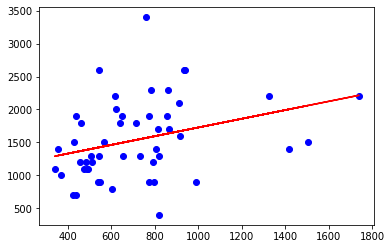

In [23]:
# 7. Convert variables into Numpy arrays #

x=df['Reported_Crime_Rate'].values.reshape(-1,1)
y=df['Droppers_rate'].values.reshape(-1,1)

# 8. Create objects for the classes #

reg= LinearRegression()
reg.fit(x,y)

y_pred=reg.predict(x)

# 9. Plot the linear regression #

plt.scatter(x,y, c='blue')
plt.plot(x,y_pred, c='red')
plt.show()

In [24]:
# 10. Compute R^2 and RMSE #

R_squared = r2_score(y,y_pred)
RMSE = np.sqrt(mean_squared_error(y,y_pred))

print('R-Squared is equal to: ', R_squared)#The closer towards 1, the better the fit
print('Root Mean Squared Error is equal to: ', RMSE) #The lower that value is, the better the fit

R-Squared is equal to:  0.10401829368952742
Root Mean Squared Error is equal to:  564.45645958214


## To conclude the n°1

We can assume with a probability of 10% that the linear equation found represents the correlation link between our 2 variables. Given that our R^2 is low, it could mean that the Crime Rate and Droppers Rate are not strongly correlated (there is no strong influence of the number of people who dropped school on the crime rate) 

# 2. Multiple Regression

The objective of this part is the same as the first 1, but this time there are 3 variables in the equation: 
- Crime_Rate : Independant Variable 1 (Feature)
- Violent_Crime_Rate : Independant Variable 2 (Feature)
- Annual_Pilice_Funds : Dependant Variable (Target)

Thus, we will determine what is the correlation between the fund allocated to Police department according to the Crime and Violent Crime rate in the city. 

In [25]:
# 0. Import necessary modules #

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#The dataset remain the same and is already load from part 1 

# 1. Print the first 5 rows # 

df.head()

,Reported_Crime_Rate,Reported_Violent_Crime,Annual_Police_Funds,Droppers_rate
City,,,,
City_1,478,184,40,1100
City_2,494,213,32,1100
City_3,643,347,57,1800
City_4,341,565,31,1100
City_5,773,327,67,900


In [27]:
# 2. Define variables: Reported Crime Rate and Reported Violent Crime (independant) and Annual Police Funds (independant)

X= df[['Reported_Crime_Rate','Reported_Violent_Crime']]
Y= df['Annual_Police_Funds']

# 3. Initiate the test #

X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.25, random_state=0)

# 4. Create objects for the classes and make them fit with the training data #

reg= LinearRegression()
reg.fit(X_train,Y_train)

# 5. Compute the coefficients and the intercept #

coef= reg.coef_
inter= reg.intercept_
print('Coefficients: `\n', coef)
print('Intercept: \n', inter)


Coefficients: `
 [0.01387898 0.00984813]
Intercept: 
 21.890606804247668


In [28]:
# 6. Make predictions on the testing data #

Y_pred = reg.predict(X_test)

print(X_test)
print(Y_pred)

         Reported_Crime_Rate  Reported_Violent_Crime
City                                                
City_29                  912                    1017
City_12                  819                     369
City_11                  506                     137
City_42                  815                     706
City_3                   643                     347
City_28                  867                     942
City_39                  989                    1375
City_32                  805                     989
City_23                  623                     254
City_5                   773                     327
City_34                  776                     404
City_36                  732                    1517
City_27                  439                     448
[44.56377673 36.89144637 30.26256176 40.15474892 34.23208788 43.20061338
 49.15808696 42.80297881 33.03863265 35.8393922  36.63933482 46.98962409
 32.39543756]


In [29]:
# 7. Compute R^2 and RMSE #

R_Squared = r2_score(Y_test,Y_pred)
RMSE = np.sqrt(mean_squared_error(Y_test,Y_pred))

print('R-Squared is equal to: ', R_squared)#The closer towards 1, the better the fit
print('Root Mean Squared Error is equal to: ', RMSE) #The lower that value is, the better the fit


R-Squared is equal to:  0.10401829368952742
Root Mean Squared Error is equal to:  14.658558304015223


## To conclude the n°2

Once again, we can see that R^2 is low (only 10%), meaning that the model found does not fit accuratly the distributio of our data. Thus, the correlation between our variables is not well defined. 

# 3. Clustering

For this part, we are going to use our initial dataset on Overwatch statistics.
The purpose is to gather the data in differents groups to analyse the behaviours of 2 variables associated together. The variables analysed are: 
- Pick Rate
- % of On Fire realized

In [30]:
# 0. Import Librairies #

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# 1. Read in a CSV file #

df = pd.read_csv("overbuff.csv", encoding = "latin1")

# 2. Clean the table: we keep only Rank, On Fire and Pick Rate #

df0 = df[['Pick_rate','On_fire','Rank',]]
df0.head()

,Pick_rate,On_fire,Rank
0,10.08,7.33,All
1,7.40,9.59,All
2,6.57,1.80,All
3,6.18,13.16,All
4,5.64,7.84,All


We are going to focus our analysis on the players ranked Bronze only in order to provide a relevant analysis. 

In [31]:
# 3. Sort the dataset by keeping only the players ranked Bronze #

df1 = df0[df0['Rank']== 'Bronze'].drop('Rank', axis=1)
#We clean our dataset in order to keep only the column analysed

df1.head()

,Pick_rate,On_fire
30,13.56,7.02
31,9.13,1.08
32,8.18,6.38
33,6.09,5.87
34,5.79,7.56


In [32]:
# 4. Determine the accurate number of clusters of the dataset #

mms = MinMaxScaler()
mms.fit(df1)
data_transformed = mms.transform(df1)

SSD =[] #Create an array for the Sum of Squared Distances 

K = range(1,15) #We assume that the number of cluster is between 1 and 15

for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    SSD.append(km.inertia_)

print(SSD)

[6.815854029854093, 4.187826486493858, 2.197328228403365, 1.5928198681538936, 1.2651242997636816, 1.0054952098812493, 0.7739635078616518, 0.6291282835863774, 0.5091067127787909, 0.4408987078499186, 0.3948542738806287, 0.3461568415653056, 0.30996868297670044, 0.26681360729816894]


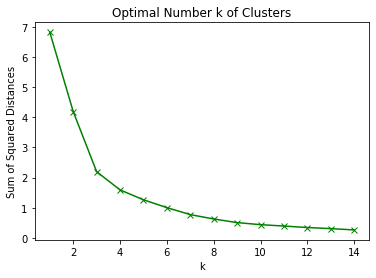

In [33]:
# 5. Plot the Sum of Squared Distance to determine visually the optimal number of clusters #

plt.plot(K, SSD, 'bx-', c='green')
plt.xlabel('k')
plt.ylabel('Sum of Squared Distances')
plt.title('Optimal Number k of Clusters')
plt.show()

We can clearly see that the curve tends to become stationary around 5. We will then cluster our data in 5 differents clusters.

In [34]:
# 6. Define the Variables #

x = df1['Pick_rate'].values
y = df1['On_fire'].values

kmeans = KMeans(n_clusters=5).fit(df1)
centroids = kmeans.cluster_centers_

kmeans.labels_.astype(float)

array([1., 4., 1., 1., 1., 1., 2., 0., 2., 0., 3., 3., 2., 0., 0., 3., 2.,
       3., 3., 0., 0., 0., 0., 3., 3., 0., 2., 2., 2., 2., 1., 1., 4., 1.,
       0., 3., 0., 3., 3., 0., 0., 0., 3., 0., 0., 3., 3., 2., 2., 2., 0.,
       0., 3., 0., 3., 3., 0., 0., 0., 0., 1., 1., 4., 1., 1., 0., 0., 0.,
       2., 3., 0., 3., 3., 2., 2., 0., 2., 0., 2., 0., 0., 2., 0., 2., 0.,
       2., 2., 0., 0., 2.])

Text(0, 0.5, 'On Fire')

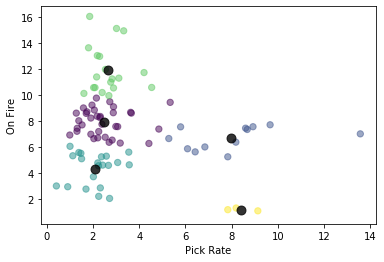

In [35]:
# 7. Plot the Cluster on a Scatter Plot #

plt.scatter(x,y, c= kmeans.labels_.astype(float), s=40, alpha=0.5)
plt.scatter(centroids[:,0],centroids[:,1],c='black', s=80, alpha=0.8)

plt.xlabel('Pick Rate')
plt.ylabel('On Fire')

## To conclude the n°3

The points in black represent the mean of all the values that belong to the cluster. 
We can see that there is one cluster which has a low on fire rate and pick rate. However, as the on fire rate inease, the pick rate is slightly increasing too, even if it's remain low. 

For that reason, it's hard to determine if there is a correlation between the both variables. 